In [1]:
#导入需要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import time
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn import metrics
import itertools

warnings.filterwarnings('ignore')
%matplotlib inline

# EDA--exploratory data analysis

In [2]:
train = pd.read_csv('train.csv')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
#检查是否有缺失值
train.isnull().any().describe()

count       202
unique        1
top       False
freq        202
dtype: object

In [4]:
train.describe() #查看数据统计量信息。

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
X = train.iloc[:, 2:].values.astype('float64')
Y = train['target'].values
print(X.shape)

(200000, 200)


<AxesSubplot:ylabel='count'>

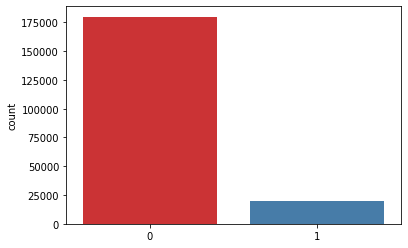

In [6]:
#检查样本是否平衡
sns.countplot(Y, palette='Set1')

In [7]:
len(Y[Y==1])

20098

In [8]:
# 定义函数用来显示消耗的时间
def show_time(values):
    t = time.strftime('%H:%M:%S',time.gmtime(values))
    return t

In [9]:
case_metrics = []

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # 设定图片有多少行，多少列，用于后面向每个格子中填充数据
    plt.imshow(cm, cmap=cmap)  # 四舍五入 interpolation='nearest'

    # 设置标题，以及颜色条
    plt.title(title)
    plt.colorbar()

    # 分为设置x方向和y方向有多少个分类，以及每个分类显示的名称
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    # 判断是否需要归一化
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 2. LR --- Logistic Regression 

data shape of train: (140000, 200)
data shape of test (60000, 200)
fitting finished!
time consumed of fitting: 00:01:51
scoring finished!
time consumed of scoring: 00:00:00
test acc of logistics regression without PCA :  0.9146666666666666


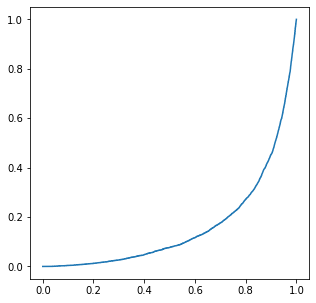

Validation AUC is  0.1605062513428895


In [36]:
# 下面使用回归模型来进行数据预测和训练
def logit_regresstion():
    x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=52)
    
    print('data shape of train:',x_train.shape)
    print('data shape of test',x_test.shape)
    model = LogisticRegression(C=9,dual=False,max_iter=x_train.shape[0])
    start_time = time.time()
    model.fit(x_train , y_train)
    print('fitting finished!')
    end_time = time.time()
    fit_time = end_time- start_time
    print('time consumed of fitting:',show_time(fit_time))
    
    start_time = time.time()
    score = model.score(x_test, y_test)
    end_time = time.time()
    score_time = end_time - start_time
    print('scoring finished!')
    print('time consumed of scoring:',show_time(score_time))
    print('test acc of logistics regression without PCA : ',score)



    #下面开始auc分析
    # 计算测试集上面预测值的概率
    pre_proba = model.predict_proba(x_test).max(axis=1)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pre_proba)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr)
    plt.show()

    auc = metrics.roc_auc_score(y_test,pre_proba)
    print('Validation AUC is ',auc)
    return [model,fit_time,score_time,score,auc]
logit_metrics = logit_regresstion()


降维后的数据训练数据 shape： (140000, 137)
降维后的测试数据shape:  (60000, 137)
fitting finished!
time consumed of fitting: 00:00:00
scoring finished!
time consumed of scoring: 00:00:00
test acc of logistics regression with PCA :  0.91305
打印混淆矩阵。。。。。。

[[179902  20098]
 [     0      0]]


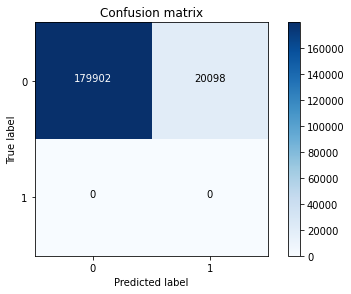

In [14]:
#使用pca对feature进行降维后，再进行训练
def logit_regresstion_with_pca():
    x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=52)

    #标准化
    std_scal = StandardScaler().fit(x_train)
    x_train_std = std_scal.transform(x_train)


    #主成分分析，通过求协方差矩阵的特征向量，利用特征向量构成的矩阵对原来的x进行转化-构成顺序按特征值大小逆序排序，转化后的特征数量是和x的特征数量相等的
    sklearn_pca = sklearnPCA().fit(x_train_std)

    #查看主成分分析后的个成分的方差信息，并且归一化
    var_per = sklearn_pca.explained_variance_ratio_
    cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

    l = len(cum_var_per[cum_var_per <= 0.7])
    sklearn_pca = sklearnPCA(n_components=l).fit(x_train_std)

    # 使用主成分分析的结果，对原特征进行较为
    x_train = sklearn_pca.transform(x_train_std)
    x_test = sklearn_pca.transform(std_scal.transform(x_test))
    print('降维后的数据训练数据 shape：',x_train.shape)
    print('降维后的测试数据shape: ',x_test.shape)

    model = LogisticRegression(C=0.3,dual=False,max_iter=x_train.shape[0])
    start_time = time.time()
    model.fit(x_train , y_train)
    print('fitting finished!')
    end_time = time.time()
    fit_time = end_time - start_time
    print('time consumed of fitting:',show_time(fit_time))
    
    start_time = time.time()
    score = model.score(x_test, y_test)
    end_time = time.time()
    score_time = end_time-start_time
    print('scoring finished!')
    print('time consumed of scoring:',show_time(score_time))
    print('test acc of logistics regression with PCA : ',score)

    #查看混淆矩阵
    print('打印混淆矩阵。。。。。。')
    predicted = model.predict(sklearn_pca.transform(X))
    print()
    confusion_mtx = metrics.confusion_matrix(predicted, Y)
    print(confusion_mtx)
    # plot the confusion matrix
    plot_confusion_matrix(confusion_mtx, classes=range(2)) 
lg_metrics_pca = logit_regresstion_with_pca()

In [16]:
from sklearn.pipeline import make_pipeline
# 使用交叉验证对模型进行训练
def logit_regresstion_with_crossvalidate(C=0.3):
    x_train = X
    pipe = make_pipeline(StandardScaler(),LogisticRegression(C=C,dual=False,max_iter=x_train.shape[0]))
    metrics = model_selection.cross_validate(pipe,x_train,Y,cv=model_selection.KFold(n_splits=7))
    for key,item in metrics.items():
        print(key,' : ',item)
logit_regresstion_with_crossvalidate(C=0.3)

fit_time  :  [1.0608108  1.05890656 1.08977151 1.05295706 1.01276183 1.05828977
 1.067168  ]
score_time  :  [0.03776169 0.03519988 0.03901458 0.03831244 0.03467798 0.03671265
 0.03678727]
test_score  :  [0.91351673 0.9148117  0.91232675 0.91414371 0.91617374 0.91246369
 0.91533373]


# 3.SVM --- Support Vector Machine

In [20]:
# 下面使用SVM
from sklearn.svm import SVC
def svm(kernel = 'rbf',C=0.3):
    model = SVC(C=C,kernel = kernel,random_state=42)

    x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=52)
    pipe = make_pipeline(StandardScaler(),model)

    start_time = time.time()
    print('start to fit......')
    pipe.fit(x_train,y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    print('fit time : ',show_time(fit_time))

    start_time  = time.time()
    score = pipe.score(x_test,y_test)
    end_time = time.time()
    score_time =  end_time-start_time
    print('score time : ',show_time(score_time))
    print('acc  is : ',score)
    return [fit_time,score_time,score]
svm_metrics = svm()


fit time :  00:34:24
score time :  600.2340214252472
acc  is :  0.9019


In [21]:
# 使用PCA降维后，再使用SVM
from sklearn.svm import SVC
def svm_pca(kernel = 'rbf',C=0.3):
    model = SVC(C=C,kernel = kernel,random_state=42)

    x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=52)

    #标准化
    std_scal = StandardScaler().fit(x_train)
    x_train_std = std_scal.transform(x_train)


    #主成分分析，通过求协方差矩阵的特征向量，利用特征向量构成的矩阵对原来的x进行转化-构成顺序按特征值大小逆序排序，转化后的特征数量是和x的特征数量相等的
    sklearn_pca = sklearnPCA().fit(x_train_std)

    #查看主成分分析后的个成分的方差信息，并且归一化
    var_per = sklearn_pca.explained_variance_ratio_
    cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

    l = len(cum_var_per[cum_var_per <= 0.7])
    sklearn_pca = sklearnPCA(n_components=l).fit(x_train_std)

    # 使用主成分分析的结果，对原特征进行降维
    x_train = sklearn_pca.transform(x_train_std)
    x_test = sklearn_pca.transform(std_scal.transform(x_test))
    print('降维后的数据训练数据 shape：',x_train.shape)
    print('降维后的测试数据shape: ',x_test.shape)

    pipe = model

    start_time = time.time()
    print('start to fit......')
    pipe.fit(x_train,y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    print('fit time : ',show_time(fit_time))

    start_time  = time.time()
    score = pipe.score(x_test,y_test)
    end_time = time.time()
    score_time =  end_time-start_time
    print('score time : ',score_time)
    print('acc  is : ',score)
    return [fit_time,score_time,score]
svm_metrics = svm_pca()

降维后的数据训练数据 shape： (140000, 137)
降维后的测试数据shape:  (60000, 137)
start to fit......


KeyboardInterrupt: 

In [23]:
# 先使用pca降维，再用交叉验证对SVM模型进行训练
def svm_with_crossvalidate(C=0.3,kernel ='rbf'):

    #标准化
    std_scal = StandardScaler().fit(X)
    x_train_std = std_scal.transform(X)

    #主成分分析，通过求协方差矩阵的特征向量，利用特征向量构成的矩阵对原来的x进行转化-构成顺序按特征值大小逆序排序，转化后的特征数量是和x的特征数量相等的
    sklearn_pca = sklearnPCA().fit(x_train_std)

    #查看主成分分析后的个成分的方差信息，并且归一化
    var_per = sklearn_pca.explained_variance_ratio_
    cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

    l = len(cum_var_per[cum_var_per <= 0.7])
    sklearn_pca = sklearnPCA(n_components=l).fit(x_train_std)
    x_train= sklearn_pca.transform(x_train_std)

    pipe = make_pipeline(StandardScaler(),SVC(C=C,kernel=kernel,random_state=52))
    print('start to fit .............')
    metrics = model_selection.cross_validate(pipe,x_train,Y,cv=model_selection.KFold(n_splits=7))
    for key,item in metrics.items():
        print(key,' : ',item)
svm_with_crossvalidate(C=0.3)

start to fit .............


# 4. NN --- Neural Network

In [14]:
#使用MLP进行训练
from sklearn import neural_network
def nn_mlp(solver ='sgd',activation='logistic'):
    model = neural_network.MLPClassifier(alpha=1e-5,  # 正则项的惩罚因子
                                     hidden_layer_sizes=(80,),
                                     # The solver for weight optimization.
                                     solver=solver,
                                     # ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
                                     # ‘sgd’ refers to stochastic gradient descent.
                                     # ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
                                     activation=activation,
                                     # ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
                                     # ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
                                     # ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
                                     # ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
                                     random_state=52)
    
    x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=52)

    #标准化
    std_scal = StandardScaler().fit(x_train)
    x_train_std = std_scal.transform(x_train)


    #主成分分析，通过求协方差矩阵的特征向量，利用特征向量构成的矩阵对原来的x进行转化-构成顺序按特征值大小逆序排序，转化后的特征数量是和x的特征数量相等的
    sklearn_pca = sklearnPCA().fit(x_train_std)

    #查看主成分分析后的个成分的方差信息，并且归一化
    var_per = sklearn_pca.explained_variance_ratio_
    cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

    l = len(cum_var_per[cum_var_per <= 0.7])
    sklearn_pca = sklearnPCA(n_components=l).fit(x_train_std)

    # 使用主成分分析的结果，对原特征进行降维
    x_train = sklearn_pca.transform(x_train_std)
    x_test = sklearn_pca.transform(std_scal.transform(x_test))
    print('降维后的数据训练数据 shape：',x_train.shape)
    print('降维后的测试数据shape: ',x_test.shape)

    start_time = time.time()
    print('start to fit......')
    model.fit(x_train,y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    print('fit time : ',show_time(fit_time))

    start_time  = time.time()
    score = model.score(x_test,y_test)
    end_time = time.time()
    score_time =  end_time-start_time
    print('score time : ',show_time(score_time))
    print('acc  is : ',score)
    return [fit_time,score_time,score]
nn_mlp_metrics = nn_mlp()

降维后的数据训练数据 shape： (140000, 137)
降维后的测试数据shape:  (60000, 137)
start to fit......
fit time :  00:00:34
score time :  00:00:00
acc  is :  0.9134


In [ ]:
#使用CNN进行训练